In [1]:
import itertools
from sklearn.metrics import confusion_matrix

In [2]:
def plot_confusion_matrix_2(cm,
                      target_names,
                      title='Tweetynet WTS on Opensoundscape with Mixed Bird Other',
                      cmap=None,
                      normalize=True,
                      FONT_SIZE = 10,
                      figsize = (8*2, 6*2)):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions


    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    https://stackoverflow.com/questions/48855290/plotted-confusion-matrix-values-overlapping-each-other-total-classes-90

    """

    #print(cm)
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    
    
    plt.figure(figsize=figsize)    # 8, 6
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90, fontsize=FONT_SIZE)
        plt.yticks(tick_marks, target_names, fontsize=FONT_SIZE)

    

    #print(cm)
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     fontsize=FONT_SIZE,
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     fontsize=FONT_SIZE,
                     color="white" if cm[i, j] > thresh else "black")


    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [3]:
from numpy import genfromtxt
import numpy as np
labels = genfromtxt('0_labels_1.csv', delimiter=',')
pred = genfromtxt('0_predictions_1.csv', delimiter=',')

#labels = np.delete(labels, 0, 0)
#pred = np.delete(labels,0,0)
#pred
#cm = confusion_matrix(labels, pred)

In [4]:
labels = np.delete(labels,0,1)
pred = np.delete(pred,0,1)

In [5]:
pred

array([[  0.],
       [186.],
       [ 19.],
       ...,
       [121.],
       [  1.],
       [243.]])

In [6]:
cm = confusion_matrix(labels,pred)
cm

array([[ 27,   0,   0, ...,   0,   0,   0],
       [  0, 895,   0, ...,   0,   0,   0],
       [  0,   0, 138, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ...,  47,   0,   1],
       [  0,   0,   0, ...,   0,  14,   0],
       [  0,   2,   0, ...,   0,   0, 424]])

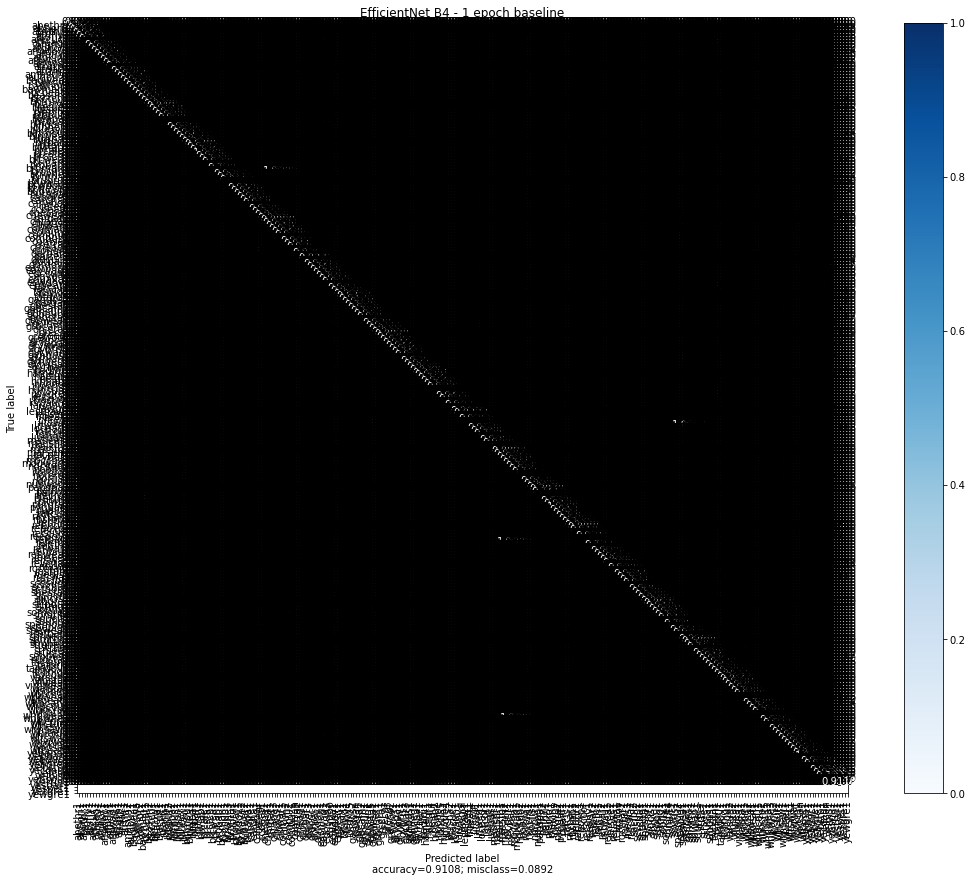

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
train_metadata = pd.read_csv("/share/acoustic_species_id/train_metadata.csv")
target_names = train_metadata["primary_label"].unique()
plot_confusion_matrix_2(cm=cm, target_names=target_names, title="EfficientNet B4 - 1 epoch baseline")

In [10]:
labels

array([[  0.],
       [186.],
       [134.],
       ...,
       [121.],
       [  1.],
       [243.]])

In [15]:
pred

array([[  0.],
       [186.],
       [ 19.],
       ...,
       [121.],
       [  1.],
       [243.]])

In [17]:
labels = labels.reshape(1,-1)
pred = pred.reshape(1,-1)

In [20]:
labels = labels[0]
pred = pred[0]

In [23]:
train_metadata = pd.read_csv("/share/acoustic_species_id/train_metadata.csv")
target_names = train_metadata["primary_label"].unique()
target_names

array(['abethr1', 'abhori1', 'abythr1', 'afbfly1', 'afdfly1', 'afecuc1',
       'affeag1', 'afgfly1', 'afghor1', 'afmdov1', 'afpfly1', 'afpkin1',
       'afpwag1', 'afrgos1', 'afrgrp1', 'afrjac1', 'afrthr1', 'amesun2',
       'augbuz1', 'bagwea1', 'barswa', 'bawhor2', 'bawman1', 'bcbeat1',
       'beasun2', 'bkctch1', 'bkfruw1', 'blacra1', 'blacuc1', 'blakit1',
       'blaplo1', 'blbpuf2', 'blcapa2', 'blfbus1', 'blhgon1', 'blhher1',
       'blksaw1', 'blnmou1', 'blnwea1', 'bltapa1', 'bltbar1', 'bltori1',
       'blwlap1', 'brcale1', 'brcsta1', 'brctch1', 'brcwea1', 'brican1',
       'brobab1', 'broman1', 'brosun1', 'brrwhe3', 'brtcha1', 'brubru1',
       'brwwar1', 'bswdov1', 'btweye2', 'bubwar2', 'butapa1', 'cabgre1',
       'carcha1', 'carwoo1', 'categr', 'ccbeat1', 'chespa1', 'chewea1',
       'chibat1', 'chtapa3', 'chucis1', 'cibwar1', 'cohmar1', 'colsun2',
       'combul2', 'combuz1', 'comsan', 'crefra2', 'crheag1', 'crohor1',
       'darbar1', 'darter3', 'didcuc1', 'dotbar1', 'du

In [26]:
from sklearn import preprocessing
y_labels = preprocessing.label_binarize(labels, classes=range(len(target_names)))
y_pred = preprocessing.label_binarize(pred, classes=range(len(target_names)))

In [29]:
np.isfinite(y_labels).all()
np.isfinite(y_pred).all()

True

In [27]:
def padded_cmap(solution, submission, padding_factor=5):
    solution = solution.drop(['row_id'], axis=1, errors='ignore')
    submission = submission.drop(['row_id'], axis=1, errors='ignore')
    new_rows = []
    for i in range(padding_factor):
        new_rows.append([1 for i in range(len(solution.columns))])
    new_rows = pd.DataFrame(new_rows)
    new_rows.columns = solution.columns
    padded_solution = pd.concat([solution, new_rows]).reset_index(drop=True).copy()
    padded_submission = pd.concat([submission, new_rows]).reset_index(drop=True).copy()
    score = sklearn.metrics.average_precision_score(
        padded_solution.values,
        padded_submission.values,
        average='macro',
    )
    return score

import sklearn
score = sklearn.metrics.average_precision_score(
        y_labels,
        y_pred,
        average='macro',
    )
score

/home/sprestrelski/miniconda3/envs/species-id/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/sprestrelski/miniconda3/envs/species-id/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/sprestrelski/miniconda3/envs/species-id/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


nan

In [45]:
true_pos = ((y_labels == 1) & (y_pred == 1)).sum(axis=0)#$.shape
false_pos = ((y_labels == 0) & (y_pred == 1)).sum(axis=0)
precision = true_pos / (true_pos + false_pos)
precision = np.nan_to_num(precision)
num_species = precision.shape[0]
precision.sum()/num_species

/home/sprestrelski/miniconda3/envs/species-id/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


0.8469360206225752

In [37]:
y_labels.shape

(85865, 264)